# 4.1 핵심 개념
- 인간의 뉴런구조와 활성화 작동원리를 근간으로 input(자극)과 ouput(반응)과의 연관을 구현
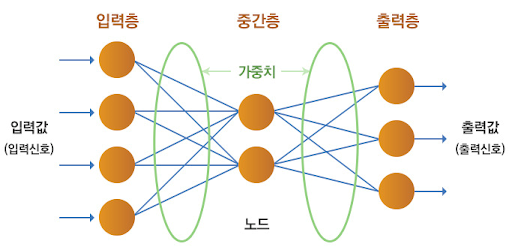
- 기초 모델 : 다층퍼셉트론
- 입력층, 출력층 = 특성치(X), 레이블(y)
- 활성화 함수 : 분류 혹은 회귀를 선형 혹은 로지스틱, RELU 등 분류 구분자의 특성

# 4.3 분석 코드

## Part1. 분류

In [5]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
data=pd.read_csv('../data/breast-cancer-wisconsin.csv', encoding='utf-8')

X=data[data.columns[1:-1]]
y=data[['Class']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, stratify=y, random_state=42)

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train)
X_scaled_train=scaler.transform(X_train)
X_scaled_test=scaler.transform(X_test)

from sklearn.neural_network import MLPClassifier
model=MLPClassifier()
model.fit(X_scaled_train, y_train)

MLPClassifier()

In [6]:
pred_train=model.predict(X_scaled_train)
model.score(X_scaled_train, y_train)

0.974609375

In [7]:
pred_test=model.predict(X_scaled_test)
model.score(X_scaled_test, y_test)

0.9590643274853801

In [10]:
from sklearn.metrics import confusion_matrix
confusion_train=confusion_matrix(y_train, pred_train)
print("훈련데이터 오차행렬 : \n", confusion_train)

from sklearn.metrics import classification_report
cfreport_train=classification_report(y_train, pred_train)
print("\n분류예측 레포트 : \n", cfreport_train)

훈련데이터 오차행렬 : 
 [[328   5]
 [  8 171]]

분류예측 레포트 : 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       333
           1       0.97      0.96      0.96       179

    accuracy                           0.97       512
   macro avg       0.97      0.97      0.97       512
weighted avg       0.97      0.97      0.97       512



In [11]:
confusion_test=confusion_matrix(y_test, pred_test)
print("테스트데이터 오차행렬 : \n", confusion_test)

cfreport_test=classification_report(y_test, pred_test)
print("\n분류예측 레포트 : \n",cfreport_test)

테스트데이터 오차행렬 : 
 [[106   5]
 [  2  58]]

분류예측 레포트 : 
               precision    recall  f1-score   support

           0       0.98      0.95      0.97       111
           1       0.92      0.97      0.94        60

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [19]:
# Grid Search
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(MLPClassifier(),
                      param_grid={'hidden_layer_sizes':[10,30,50,70,90,100],
                                 'solver':['adam','sgd'],
                                 'activation':['tanh','relu']},
                      cv=5)
grid_search.fit(X_scaled_train, y_train)

print(f"Best Parameter : {grid_search.best_params_}")
print(f"Best Score : {grid_search.best_score_:.4f}")
print(f"TestSet Score : {grid_search.score(X_scaled_test, y_test):.4f}")

Best Parameter : {'activation': 'relu', 'hidden_layer_sizes': 90, 'solver': 'adam'}
Best Score : 0.9746
TestSet Score : 0.9591


In [23]:
# Random Search
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
random_search=RandomizedSearchCV(MLPClassifier(),
                                param_distributions={'hidden_layer_sizes' : randint(low=10, high=100),
                                                    'solver':['adam','sgd'],
                                                    'activation':['tanh','relu']},
                                cv=5,
                                n_iter=10)
random_search.fit(X_scaled_train, y_train)

print(f"Best Parameter : {random_search.best_params_}")
print(f"Best Score : {random_search.best_score_:.4f}")
print(f"TestSet Score : {random_search.score(X_scaled_test, y_test):.4f}")

Best Parameter : {'activation': 'relu', 'hidden_layer_sizes': 58, 'solver': 'adam'}
Best Score : 0.9707
TestSet Score : 0.9591


# Part2. 회귀

In [30]:
data2=pd.read_csv("../data/house_price.csv", encoding='utf-8')

X=data2[data2.columns[:-1]]
y=data2[['house_value']]

X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=42)

scaler=MinMaxScaler()
scaler.fit(X_train)
X_scaled_train=scaler.transform(X_train)
X_scaled_test=scaler.transform(X_test)

from sklearn.neural_network import MLPRegressor
model=MLPRegressor()
model.fit(X_scaled_train, y_train)

pred_train=model.predict(X_scaled_train)
print("TrainSet Score : ",model.score(X_scaled_train, y_train))

pred_test=model.predict(X_scaled_test)
print("TestSet Score : ",model.score(X_scaled_test, y_test))

TrainSet Score :  -2.4648418586754492
TestSet Score :  -2.42552696140722


In [31]:
# RMSE
import numpy as np
from sklearn.metrics import mean_squared_error
MSE_train=mean_squared_error(y_train, pred_train)
MSE_test=mean_squared_error(y_test, pred_test)
print(f"훈련 데이터 RMSE : {np.sqrt(MSE_train)}")
print(f"테스트 데이터 RMSE : {np.sqrt(MSE_test)}")

훈련 데이터 RMSE : 177661.26605457577
테스트 데이터 RMSE : 176940.0594864412


In [32]:
model=MLPRegressor?

In [33]:
#하이퍼파라미터가 매우 다양하여 최적 조합을 찾는 것이 힘들다.
model=MLPRegressor(hidden_layer_sizes=(100,100,100),
                  random_state=1,
                  max_iter=2000)
model.fit(X_scaled_train, y_train)
pred_train=model.predict(X_scaled_train)
model.score(X_scaled_train, y_train)

0.5954306545769066

In [35]:
pred_test=model.predict(X_scaled_test)
model.score(X_scaled_test, y_test)

0.607592385150034

In [36]:
#RMSE
MSE_train=mean_squared_error(y_train, pred_train)
MSE_test=mean_squared_error(y_test, pred_test)

print(f"훈련데이터 RMSE : {np.sqrt(MSE_train)}")
print(f"테스트데이터 RMSE : {np.sqrt(MSE_test)}")

훈련데이터 RMSE : 60708.224339623855
테스트데이터 RMSE : 59886.81097477139
